# Parsing APIs

In [12]:
import json
import requests as r
import pandas as pd
from pandas.io.json import json_normalize
import time

In [13]:
url = 'https://www.zalando.fr/api/catalog/articles?categories=promo-enfant&limit=84&offset=84&sort=sale'

In [10]:
# url =  'https://www.imdb.com/search/title/?year=2000-01-01,2000-12-31&sort=num_votes,desc&ref_=adv_prv'

In [11]:
# from bs4 import BeautifulSoup
response = r.get(url)
# soup = BeautifulSoup(response.text, 'lxml')
# soup

ConnectionError: ('Connection aborted.', OSError("(10060, 'WSAETIMEDOUT')"))

In [16]:
# Copy Paste from request header
#Following lines that are commented out are how we work around Zalando not wanting give us access

#:authority: www.zalando.fr
#:method: GET
#:path: /api/catalog/articles?categories=promo-enfant&limit=84&offset=84&sort=sale
#:scheme: https
#accept: */*
#accept-encoding: gzip, deflate, br
#accept-language: en-US,en;q=0.9,la;q=0.8,sv;q=0.7,fr;q=0.6
#referer: https://www.zalando.fr/promo-enfant/
#sec-fetch-mode: cors
#sec-fetch-site: same-origin

  #Creating a dict call headers containing following info. Have to put the key value pairs in quotes

url = 'https://www.zalando.fr/api/catalog/articles?categories=promo-enfant&limit=84&offset=84&sort=sale'
headers={"cookie": "fvgs_ml=mosaic; frsx=AAAAAMUzbJ9-O5brYOEtnWJ75TMJBVwscBHukH31sKkfBHFUvNYYysgYgNISMTxeu-OeTGCG2KwC7vc9YAYTKkhjsAPhtLbZAkHSSPUR5FsyQg-mg5ZQ0vWQ5YRfiEl7ZHovHPqOzlKsxvuDAr9IFus=; Zalando-Client-Id=1efd9ba1-5258-4783-9900-2e3899a26e40; bm_sz=3C59E543A165C639C4983F36CFF4786B~YAAQBv4BFzxj6X5sAQAA2jnkqAQuZumXxHxuSrc+eh/T6sxjzjyEhThfQgHzH7V3vbPgqK0088IrS/Q+3zhuoCQCwwShT4SEzSvhiPGtGerjUgVECeFyoZhE5lVCouVwnFGqc8HiaUJftAxSmcBkkQT7nJpPnw6TNlDuubVX3u22o71RucrsRtVM/pmKkUrw; _ga=GA1.2.1191847694.1566201624; _abck=0ED8C82EFEA8382C0BAF8299290E14FB~0~YAAQBv4BFz9j6X5sAQAA1zzkqAK2RBECzotZsDR5nnw08Ot+VdXwWGJMnjd6ya2YbsB4N9T3jAMY8RRr3XaZyu+AvbKp4tqKnP5wQ9IWmoexy1VQMaxIr78hIX76AxHl23/Ni/8QLTq4z1RQXE/v6qfhIvSXrb50n8tSI5f7FVtmdfP9n45CWCx5hnEWj9vwMAQi9qY6R7zKUjPGwAlbnr7VKugSscbz6O3Uu/ZJokppxFpYfLcJpPjXPs89sxMXynkov5kLywI3Brt5Y8SZDz/InhcXULp1n4Z3gET3wcLRHds67ijLX2k=~-1~-1~-1; ak_bmsc=AAC45AF98F141DA5FFDBB93F286468121701FE064532000019575A5D571A3624~plu+mb1Ihe2XBBifrsDQ4DXb+yjb6KOrHaiJux8bJbxdu4iRLmJ0U0rbmn1R/a85pNzBpLRrJvrwEdOmJZ25Zev9E1H1/HxfOCTVj1uqvezI8gJ13L0T8NdlYOLxVHe4RLkvLrCXC5F4QvCqv843HV0H27PM+EeazXEsojrr+OrsO1uo5iT2YfiStUdm4rxN3xuWBwu2z42oyeDcL0A/laBl6k3fLDHQMkzrfdldtMtXKjQyBAzE24WnHP1y9u+92X; ncx=k",

'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36',


'x-xsrf-token': 'AAAAAMUzbJ9-O5brYOEtnWJ75TMJBVwscBHukH31sKkfBHFUvNYYysgYgNISMTxeu-OeTGCG2KwC7vc9YAYTKkhjsAPhtLbZAkHSSPUR5FsyQg-mg5ZQ0vWQ5YRfiEl7ZHovHPqOzlKsxvuDAr9IFus=',
'x-zalando-catalog-nakadi-context': '%22%3A%5B%22promo-enfant%22%5D%2C%22previous_selected_filters%22%3A%5B%5D%2C%22preselected_filters%22%3A%5B%5D%7D',
'x-zalando-octopus-tests': '%5B%7B%22testName%22%3A%22mobile-filters-design%22%2C%22testVariant%22%3A%22mobile-light-filters%22%2C%22testFeedbackId%22%3A%2200000000-0000-0000-0000-000000000000%3A__EMPTY__%22%7D%2C%7B%22testName%22%3A%22image-test%22%2C%22testVariant%22%3A%22Control%20Variant%20A%20Test1%22%2C%22testFeedbackId%22%3A%2282baf50f-d236-47ea-a8f7-a36d388bca89%3Aclientid-1efd9ba1-5258-4783-9900-2e3899a26e40%22%7D%2C%7B%22testName%22%3A%22teaser-card-test%22%2C%22testVariant%22%3A%22outward%22%2C%22testFeedbackId%22%3A%2200000000-0000-0000-0000-000000000000%3A__EMPTY__%22%7D%2C%7B%22testName%22%3A%22filter-cleanup-test%22%2C%22testVariant%22%3A%22sorting-in-filter-toggle-groups%22%2C%22testFeedbackId%22%3A%22717403e6-fe98-4d17-9208-c9f40f1232b8%3Aclientid-1efd9ba1-5258-4783-9900-2e3899a26e40%22%7D%5D'}
    
    

In [ ]:
#Why 

In [20]:
response = r.get(url, headers=headers)

In [22]:
result=response.json()
result

{'total_count': 25199,
 'pagination': {'page_count': 300, 'current_page': 2, 'per_page': 84},
 'sort': 'sale',
 'articles': [{'sku': 'C2723F04E-J11',
   'name': "BABY ROBE - Robe d'été - chamallow",
   'price': {'original': '64,95\xa0€',
    'promotional': '25,95\xa0€',
    'has_different_prices': False,
    'has_different_original_prices': False,
    'has_different_promotional_prices': False,
    'has_discount_on_selected_sizes_only': False},
   'sizes': ['3m', '6m', '9m', '12m', '18m'],
   'url_key': 'catimini-baby-robe-robe-dete-chamallow-c2723f04e-j11',
   'media': [{'path': 'C2/72/3F/04/EJ/11/C2723F04E-J11@14.jpg',
     'role': 'DEFAULT',
     'packet_shot': False}],
   'brand_name': 'Catimini',
   'is_premium': True,
   'family_articles': [],
   'flags': [{'key': 'campaign',
     'value': 'BLACKFRIDAY',
     'tracking_value': 'cyber_black_friday_2019'},
    {'key': 'discountRate',
     'value': '-60%',
     'tracking_value': 'discount rate'}],
   'product_group': 'clothing',
   '

In [23]:
flat_data = json_normalize(result)
flat_data

,articles,articlesToShow,breadcrumbs,carouselTeaser,categoryTree,collection,contentPositions.entry-point-teasers,contentPositions.in-cat-carousel,contentPositions.in-cat-carousel-fullwidth,contentPositions.in-cat-carousel-mobile,...,total_article_count,total_count,upperInCatTeaser,variants.fullWidthCatalog,variants.hideCategories,variants.mobileLightFilters,variants.myBrandsFilter,variants.premiumCatalog,variants.truncatedCount,wishlist
0,"[{'sku': 'C2723F04E-J11', 'name': 'BABY ROBE -...",84,"[{'items': [{'label': 'Enfant', 'url_key': 'en...",None,"[{'label': 'BLACK FRIDAY', 'id': '9574', 'url_...",None,"[7, 14, 20, 26]",9,8,6,...,25172,25199,None,False,False,True,True,False,False,None


In [25]:
#Access the 'articles' dict from result since it is the only one we care about
flat_data1=json_normalize(flat_data.articles[0])
flat_data1=flat_data1.set_index('sku')
flat_data1

,amount,brand_name,delivery_promises,family_articles,flags,is_premium,media,name,price.has_different_original_prices,price.has_different_prices,price.has_different_promotional_prices,price.has_discount_on_selected_sizes_only,price.original,price.promotional,product_group,sizes,url_key
sku,,,,,,,,,,,,,,,,,
C2723F04E-J11,NaN,Catimini,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",True,[{'path': 'C2/72/3F/04/EJ/11/C2723F04E-J11@14....,BABY ROBE - Robe d'été - chamallow,False,False,False,False,"64,95 €","25,95 €",clothing,"[3m, 6m, 9m, 12m, 18m]",catimini-baby-robe-robe-dete-chamallow-c2723f0...
LA216D018-A11,NaN,Lacoste,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",True,[{'path': 'LA/21/6D/01/8A/11/LA216D018-A11@7.j...,LEROND - Baskets basses - white/navy,False,False,False,False,"59,95 €","35,95 €",shoe,"[28, 29, 30, 31, 32, 33, 34]",lacoste-lerond-baskets-basses-whitenavy-la216d...
RI923D044-A11,NaN,River Island,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",False,[{'path': 'RI/92/3D/04/4A/11/RI923D044-A11@9.j...,Pantalon classique - white,False,False,False,False,"33,00 €","9,90 €",clothing,"[0-3m, 3-6m, 6-9m, 9-12m]",river-island-t-shirt-imprime-white-ri923d044-a11
PO224G0A4-M11,NaN,Polo Ralph Lauren,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",True,[{'path': 'PO/22/4G/0A/4M/11/PO224G0A4-M11@6.j...,BASIC - Polo - earth blue,False,False,False,False,"49,95 €","39,95 €",clothing,"[2a, 3a, 4a, 5a, 6a, S, M, L, 1.5a]",polo-ralph-lauren-basic-polo-po224g0a4-m11
BAS23F018-Q11,NaN,WAUW CAPOW by Bangbang Copenhagen,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",True,[{'path': 'BA/S2/3F/01/8Q/11/BAS23F018-Q11@7.j...,SWING - Robe en jersey - black/white,False,False,False,False,"64,95 €","25,95 €",clothing,"[3-4a, 4-5a, 5-6a, 6-7a, 8-9a]",wauw-capow-by-bang-bang-swing-robe-en-jersey-b...
NI114D0BL-Q11,NaN,Nike Sportswear,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",False,[{'path': 'NI/11/4D/0B/LQ/11/NI114D0BL-Q11@8.j...,EXPLORE STRADA - Baskets basses - black,False,False,False,False,"39,95 €","27,95 €",shoe,"[28, 28.5, 29.5, 30, 31.5, 32, 33.5, 34]",nike-sportswear-explore-strada-baskets-basses-...
NI114D03N-K14,NaN,Nike Sportswear,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",False,[{'path': 'NI/11/4D/03/NK/14/NI114D03N-K14@11....,MD RUNNER 2 - Baskets basses - gym blue/white/...,False,True,True,False,"39,95 €","25,95 €",shoe,"[28, 29.5, 30, 31, 31.5, 32, 33, 33.5, 34, 35]",nike-sportswear-md-runner-2-baskets-basses-ni1...
CO416A000-G00,NaN,Converse,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",False,[{'path': 'CO/41/6A/00/0G/00/CO416A000-G00@19....,CHUCK TAYLOR ALL STAR CORE - Baskets basses - red,False,False,False,False,"39,95 €","23,95 €",shoe,"[20, 21, 22, 23, 24, 25, 26]",converse-chuck-taylor-baskets-basses-rouge-co4...
PO224G05W-K11,NaN,Polo Ralph Lauren,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",True,[{'path': 'PO/22/4G/05/WK/11/PO224G05W-K11@6.j...,BABY - T-shirt basique - cruise navy,False,False,False,False,"18,95 €","13,25 €",clothing,"[3-6m, 6-9m, 9-12m, 12-18m, 18-24m, 24m]",polo-ralph-lauren-baby-t-shirt-imprime-po224g0...


In [26]:
flat_data1.brand_name.value_counts()

Nike Sportswear                      28
adidas Originals                      9
Converse                              8
Tommy Hilfiger                        5
Puma                                  4
Lacoste                               3
Billieblush                           2
Geox                                  2
Polo Ralph Lauren                     2
Benetton                              2
Catimini                              1
Vans                                  1
Calvin Klein Jeans                    1
OVS                                   1
Name it                               1
Quiksilver                            1
Pepe Jeans                            1
DC Shoes                              1
WAUW CAPOW by Bangbang Copenhagen     1
Molo                                  1
adidas Performance                    1
Massimo Dutti                         1
Skechers                              1
Timberland                            1
River Island                          1


In [27]:
# response=r.get('https://jsonplaceholder.typicode.com/todos')
# results=response.json()
# results

In [23]:
data=pd.DataFrame(results)

In [24]:
data.head()

,completed,id,title,userId
0,False,1,delectus aut autem,1
1,False,2,quis ut nam facilis et officia qui,1
2,False,3,fugiat veniam minus,1
3,True,4,et porro tempora,1
4,False,5,laboriosam mollitia et enim quasi adipisci qui...,1


In [26]:
response=r.get('https://api.github.com/events')
results=response.json()
data=pd.DataFrame(results)
data.head()

,actor,created_at,id,org,payload,public,repo,type
0,"{'id': 54264637, 'login': 'comscilearner', 'di...",2019-08-19T09:11:25Z,10235446678,NaN,"{'push_id': 3937315143, 'size': 1, 'distinct_s...",True,"{'id': 203134096, 'name': 'comscilearner/Djang...",PushEvent
1,"{'id': 36744683, 'login': 'Ernibae', 'display_...",2019-08-19T09:11:25Z,10235446672,NaN,"{'push_id': 3937315327, 'size': 1, 'distinct_s...",True,"{'id': 201240838, 'name': 'Ernibae/panchito', ...",PushEvent
2,"{'id': 22429695, 'login': 'codecov[bot]', 'dis...",2019-08-19T09:11:25Z,10235446669,NaN,"{'action': 'created', 'issue': {'url': 'https:...",True,"{'id': 94055110, 'name': 'nojimage/cakephp-rem...",IssueCommentEvent
3,"{'id': 15890747, 'login': 'PGijsbers', 'displa...",2019-08-19T09:11:25Z,10235446664,"{'id': 4984562, 'login': 'openml', 'gravatar_i...","{'action': 'closed', 'number': 764, 'pull_requ...",True,"{'id': 17939040, 'name': 'openml/openml-python...",PullRequestEvent
4,"{'id': 359443, 'login': 'gliburch', 'display_l...",2019-08-19T09:11:25Z,10235446656,NaN,"{'push_id': 3937315322, 'size': 2, 'distinct_s...",True,"{'id': 187576383, 'name': 'gliburch/vitahani',...",PushEvent


In [28]:
def flatten(data, col_list):
    for column in col_list:
        flattened = pd.DataFrame(dict(data[column])).transpose()
        columns = [str(col) for col in flattened.columns]
        flattened.columns = [column + '_' + colname for colname in columns]
        data = pd.concat([data, flattened], axis=1)
        data = data.drop(column, axis=1)
    return data

In [30]:
flatten(data, ['actor', 'payload', 'repo', 'org'])

,created_at,id,public,type,actor_avatar_url,actor_display_login,actor_gravatar_id,actor_id,actor_login,actor_url,...,payload_ref_type,payload_size,repo_id,repo_name,repo_url,org_avatar_url,org_gravatar_id,org_id,org_login,org_url
0,2019-08-19T09:11:25Z,10235446678,True,PushEvent,https://avatars.githubusercontent.com/u/54264637?,comscilearner,,54264637,comscilearner,https://api.github.com/users/comscilearner,...,NaN,1,203134096,comscilearner/DjangoGirls,https://api.github.com/repos/comscilearner/Dja...,NaN,NaN,NaN,NaN,NaN
1,2019-08-19T09:11:25Z,10235446672,True,PushEvent,https://avatars.githubusercontent.com/u/36744683?,Ernibae,,36744683,Ernibae,https://api.github.com/users/Ernibae,...,NaN,1,201240838,Ernibae/panchito,https://api.github.com/repos/Ernibae/panchito,NaN,NaN,NaN,NaN,NaN
2,2019-08-19T09:11:25Z,10235446669,True,IssueCommentEvent,https://avatars.githubusercontent.com/u/22429695?,codecov,,22429695,codecov[bot],https://api.github.com/users/codecov[bot],...,NaN,NaN,94055110,nojimage/cakephp-remember-me,https://api.github.com/repos/nojimage/cakephp-...,NaN,NaN,NaN,NaN,NaN
3,2019-08-19T09:11:25Z,10235446664,True,PullRequestEvent,https://avatars.githubusercontent.com/u/15890747?,PGijsbers,,15890747,PGijsbers,https://api.github.com/users/PGijsbers,...,NaN,NaN,17939040,openml/openml-python,https://api.github.com/repos/openml/openml-python,https://avatars.githubusercontent.com/u/4984562?,,4984562,openml,https://api.github.com/orgs/openml
4,2019-08-19T09:11:25Z,10235446656,True,PushEvent,https://avatars.githubusercontent.com/u/359443?,gliburch,,359443,gliburch,https://api.github.com/users/gliburch,...,NaN,2,187576383,gliburch/vitahani,https://api.github.com/repos/gliburch/vitahani,NaN,NaN,NaN,NaN,NaN
5,2019-08-19T09:11:25Z,10235446654,True,PushEvent,https://avatars.githubusercontent.com/u/44525521?,JBFourierous,,44525521,JBFourierous,https://api.github.com/users/JBFourierous,...,NaN,1,198462114,JBFourierous/Embedded-Systems-Ranger_Vervet,https://api.github.com/repos/JBFourierous/Embe...,NaN,NaN,NaN,NaN,NaN
6,2019-08-19T09:11:25Z,10235446655,True,PullRequestEvent,https://avatars.githubusercontent.com/u/9754165?,lucien-george,,9754165,lucien-george,https://api.github.com/users/lucien-george,...,NaN,NaN,203133612,lucien-george/devise-101,https://api.github.com/repos/lucien-george/dev...,NaN,NaN,NaN,NaN,NaN
7,2019-08-19T09:11:25Z,10235446649,True,CreateEvent,https://avatars.githubusercontent.com/u/2096101?,Kikobeats,,2096101,Kikobeats,https://api.github.com/users/Kikobeats,...,branch,NaN,102619418,Kikobeats/browserless,https://api.github.com/repos/Kikobeats/browser...,NaN,NaN,NaN,NaN,NaN
8,2019-08-19T09:11:25Z,10235446642,True,PullRequestEvent,https://avatars.githubusercontent.com/u/27856297?,dependabot-preview,,27856297,dependabot-preview[bot],https://api.github.com/users/dependabot-previe...,...,NaN,NaN,171144786,quasarframework/app-extension-dotenv,https://api.github.com/repos/quasarframework/a...,https://avatars.githubusercontent.com/u/23064371?,,23064371,quasarframework,https://api.github.com/orgs/quasarframework
9,2019-08-19T09:11:25Z,10235446629,True,PushEvent,https://avatars.githubusercontent.com/u/21335629?,mmmaaaggg,,21335629,mmmaaaggg,https://api.github.com/users/mmmaaaggg,...,NaN,2,188362399,running-on-faith/code_mess,https://api.github.com/repos/running-on-faith/...,https://avatars.githubusercontent.com/u/50979488?,,50979488,running-on-faith,https://api.github.com/orgs/running-on-faith


In [31]:
json_normalize(results)

,actor.avatar_url,actor.display_login,actor.gravatar_id,actor.id,actor.login,actor.url,created_at,id,org.avatar_url,org.gravatar_id,...,payload.push_id,payload.pusher_type,payload.ref,payload.ref_type,payload.size,public,repo.id,repo.name,repo.url,type
0,https://avatars.githubusercontent.com/u/54264637?,comscilearner,,54264637,comscilearner,https://api.github.com/users/comscilearner,2019-08-19T09:11:25Z,10235446678,NaN,NaN,...,3.937315e+09,NaN,refs/heads/master,NaN,1.0,True,203134096,comscilearner/DjangoGirls,https://api.github.com/repos/comscilearner/Dja...,PushEvent
1,https://avatars.githubusercontent.com/u/36744683?,Ernibae,,36744683,Ernibae,https://api.github.com/users/Ernibae,2019-08-19T09:11:25Z,10235446672,NaN,NaN,...,3.937315e+09,NaN,refs/heads/master,NaN,1.0,True,201240838,Ernibae/panchito,https://api.github.com/repos/Ernibae/panchito,PushEvent
2,https://avatars.githubusercontent.com/u/22429695?,codecov,,22429695,codecov[bot],https://api.github.com/users/codecov[bot],2019-08-19T09:11:25Z,10235446669,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,94055110,nojimage/cakephp-remember-me,https://api.github.com/repos/nojimage/cakephp-...,IssueCommentEvent
3,https://avatars.githubusercontent.com/u/15890747?,PGijsbers,,15890747,PGijsbers,https://api.github.com/users/PGijsbers,2019-08-19T09:11:25Z,10235446664,https://avatars.githubusercontent.com/u/4984562?,,...,NaN,NaN,NaN,NaN,NaN,True,17939040,openml/openml-python,https://api.github.com/repos/openml/openml-python,PullRequestEvent
4,https://avatars.githubusercontent.com/u/359443?,gliburch,,359443,gliburch,https://api.github.com/users/gliburch,2019-08-19T09:11:25Z,10235446656,NaN,NaN,...,3.937315e+09,NaN,refs/heads/master,NaN,2.0,True,187576383,gliburch/vitahani,https://api.github.com/repos/gliburch/vitahani,PushEvent
5,https://avatars.githubusercontent.com/u/44525521?,JBFourierous,,44525521,JBFourierous,https://api.github.com/users/JBFourierous,2019-08-19T09:11:25Z,10235446654,NaN,NaN,...,3.937315e+09,NaN,refs/heads/master,NaN,1.0,True,198462114,JBFourierous/Embedded-Systems-Ranger_Vervet,https://api.github.com/repos/JBFourierous/Embe...,PushEvent
6,https://avatars.githubusercontent.com/u/9754165?,lucien-george,,9754165,lucien-george,https://api.github.com/users/lucien-george,2019-08-19T09:11:25Z,10235446655,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,True,203133612,lucien-george/devise-101,https://api.github.com/repos/lucien-george/dev...,PullRequestEvent
7,https://avatars.githubusercontent.com/u/2096101?,Kikobeats,,2096101,Kikobeats,https://api.github.com/users/Kikobeats,2019-08-19T09:11:25Z,10235446649,NaN,NaN,...,NaN,user,zombie,branch,NaN,True,102619418,Kikobeats/browserless,https://api.github.com/repos/Kikobeats/browser...,CreateEvent
8,https://avatars.githubusercontent.com/u/27856297?,dependabot-preview,,27856297,dependabot-preview[bot],https://api.github.com/users/dependabot-previe...,2019-08-19T09:11:25Z,10235446642,https://avatars.githubusercontent.com/u/23064371?,,...,NaN,NaN,NaN,NaN,NaN,True,171144786,quasarframework/app-extension-dotenv,https://api.github.com/repos/quasarframework/a...,PullRequestEvent
9,https://avatars.githubusercontent.com/u/21335629?,mmmaaaggg,,21335629,mmmaaaggg,https://api.github.com/users/mmmaaaggg,2019-08-19T09:11:25Z,10235446629,https://avatars.githubusercontent.com/u/50979488?,,...,3.937315e+09,NaN,refs/heads/master,NaN,2.0,True,188362399,running-on-faith/code_mess,https://api.github.com/repos/running-on-faith/...,PushEvent


In [28]:
url = 'https://www.zalando.fr/api/catalog/articles?categories=promo-enfant&limit=84&offset=84&sort=sale'
headers={"cookie": "fvgs_ml=mosaic; frsx=AAAAAMUzbJ9-O5brYOEtnWJ75TMJBVwscBHukH31sKkfBHFUvNYYysgYgNISMTxeu-OeTGCG2KwC7vc9YAYTKkhjsAPhtLbZAkHSSPUR5FsyQg-mg5ZQ0vWQ5YRfiEl7ZHovHPqOzlKsxvuDAr9IFus=; Zalando-Client-Id=1efd9ba1-5258-4783-9900-2e3899a26e40; bm_sz=3C59E543A165C639C4983F36CFF4786B~YAAQBv4BFzxj6X5sAQAA2jnkqAQuZumXxHxuSrc+eh/T6sxjzjyEhThfQgHzH7V3vbPgqK0088IrS/Q+3zhuoCQCwwShT4SEzSvhiPGtGerjUgVECeFyoZhE5lVCouVwnFGqc8HiaUJftAxSmcBkkQT7nJpPnw6TNlDuubVX3u22o71RucrsRtVM/pmKkUrw; _ga=GA1.2.1191847694.1566201624; _abck=0ED8C82EFEA8382C0BAF8299290E14FB~0~YAAQBv4BFz9j6X5sAQAA1zzkqAK2RBECzotZsDR5nnw08Ot+VdXwWGJMnjd6ya2YbsB4N9T3jAMY8RRr3XaZyu+AvbKp4tqKnP5wQ9IWmoexy1VQMaxIr78hIX76AxHl23/Ni/8QLTq4z1RQXE/v6qfhIvSXrb50n8tSI5f7FVtmdfP9n45CWCx5hnEWj9vwMAQi9qY6R7zKUjPGwAlbnr7VKugSscbz6O3Uu/ZJokppxFpYfLcJpPjXPs89sxMXynkov5kLywI3Brt5Y8SZDz/InhcXULp1n4Z3gET3wcLRHds67ijLX2k=~-1~-1~-1; ak_bmsc=AAC45AF98F141DA5FFDBB93F286468121701FE064532000019575A5D571A3624~plu+mb1Ihe2XBBifrsDQ4DXb+yjb6KOrHaiJux8bJbxdu4iRLmJ0U0rbmn1R/a85pNzBpLRrJvrwEdOmJZ25Zev9E1H1/HxfOCTVj1uqvezI8gJ13L0T8NdlYOLxVHe4RLkvLrCXC5F4QvCqv843HV0H27PM+EeazXEsojrr+OrsO1uo5iT2YfiStUdm4rxN3xuWBwu2z42oyeDcL0A/laBl6k3fLDHQMkzrfdldtMtXKjQyBAzE24WnHP1y9u+92X; ncx=k",

'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36',


'x-xsrf-token': 'AAAAAMUzbJ9-O5brYOEtnWJ75TMJBVwscBHukH31sKkfBHFUvNYYysgYgNISMTxeu-OeTGCG2KwC7vc9YAYTKkhjsAPhtLbZAkHSSPUR5FsyQg-mg5ZQ0vWQ5YRfiEl7ZHovHPqOzlKsxvuDAr9IFus=',
'x-zalando-catalog-nakadi-context': '%22%3A%5B%22promo-enfant%22%5D%2C%22previous_selected_filters%22%3A%5B%5D%2C%22preselected_filters%22%3A%5B%5D%7D',
'x-zalando-octopus-tests': '%5B%7B%22testName%22%3A%22mobile-filters-design%22%2C%22testVariant%22%3A%22mobile-light-filters%22%2C%22testFeedbackId%22%3A%2200000000-0000-0000-0000-000000000000%3A__EMPTY__%22%7D%2C%7B%22testName%22%3A%22image-test%22%2C%22testVariant%22%3A%22Control%20Variant%20A%20Test1%22%2C%22testFeedbackId%22%3A%2282baf50f-d236-47ea-a8f7-a36d388bca89%3Aclientid-1efd9ba1-5258-4783-9900-2e3899a26e40%22%7D%2C%7B%22testName%22%3A%22teaser-card-test%22%2C%22testVariant%22%3A%22outward%22%2C%22testFeedbackId%22%3A%2200000000-0000-0000-0000-000000000000%3A__EMPTY__%22%7D%2C%7B%22testName%22%3A%22filter-cleanup-test%22%2C%22testVariant%22%3A%22sorting-in-filter-toggle-groups%22%2C%22testFeedbackId%22%3A%22717403e6-fe98-4d17-9208-c9f40f1232b8%3Aclientid-1efd9ba1-5258-4783-9900-2e3899a26e40%22%7D%5D'}
    
    

In [29]:
response=r.get(url,headers=headers)
result=response.json()

In [30]:
flattened_data=json_normalize(result)
flattened_data=json_normalize(flattened_data.articles[0])

In [33]:
flattened_data

,amount,brand_name,delivery_promises,family_articles,flags,is_premium,media,name,price.has_different_original_prices,price.has_different_prices,price.has_different_promotional_prices,price.has_discount_on_selected_sizes_only,price.original,price.promotional,product_group,sizes,sku,url_key
0,NaN,Nike Sportswear,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",False,[{'path': 'NI/12/6G/00/LQ/11/NI126G00L-Q11@5.j...,TEE - T-shirt imprimé - black,False,False,False,False,"15,95 €","9,55 €",clothing,"[2-3a, 4-5a, 5-6a, 6-7a]",NI126G00L-Q11,nike-sportswear-tee-t-shirt-imprime-ni126g00l-q11
1,NaN,Lacoste,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",True,[{'path': 'LA/21/6D/01/8A/11/LA216D018-A11@7.j...,LEROND - Baskets basses - white/navy,False,False,False,False,"59,95 €","35,95 €",shoe,"[28, 29, 30, 31, 32, 33, 34]",LA216D018-A11,lacoste-lerond-baskets-basses-whitenavy-la216d...
2,NaN,River Island,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",False,[{'path': 'RI/92/3D/04/4A/11/RI923D044-A11@9.j...,Pantalon classique - white,False,False,False,False,"33,00 €","9,90 €",clothing,"[0-3m, 3-6m, 6-9m, 9-12m]",RI923D044-A11,river-island-t-shirt-imprime-white-ri923d044-a11
3,NaN,Polo Ralph Lauren,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",True,[{'path': 'PO/22/4G/0A/4M/11/PO224G0A4-M11@6.j...,BASIC - Polo - earth blue,False,False,False,False,"49,95 €","39,95 €",clothing,"[2a, 3a, 4a, 5a, 6a, S, M, L, 1.5a]",PO224G0A4-M11,polo-ralph-lauren-basic-polo-po224g0a4-m11
4,NaN,WAUW CAPOW by Bangbang Copenhagen,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",True,[{'path': 'BA/S2/3F/01/8Q/11/BAS23F018-Q11@7.j...,SWING - Robe en jersey - black/white,False,False,False,False,"64,95 €","25,95 €",clothing,"[3-4a, 4-5a, 5-6a, 6-7a, 8-9a]",BAS23F018-Q11,wauw-capow-by-bang-bang-swing-robe-en-jersey-b...
5,NaN,Nike Sportswear,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",False,[{'path': 'NI/11/4D/0B/LQ/11/NI114D0BL-Q11@8.j...,EXPLORE STRADA - Baskets basses - black,False,False,False,False,"39,95 €","27,95 €",shoe,"[28, 28.5, 29.5, 30, 31.5, 32, 33.5, 34]",NI114D0BL-Q11,nike-sportswear-explore-strada-baskets-basses-...
6,NaN,Nike Sportswear,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",False,[{'path': 'NI/11/4D/03/NK/14/NI114D03N-K14@11....,MD RUNNER 2 - Baskets basses - gym blue/white/...,False,True,True,False,"39,95 €","25,95 €",shoe,"[28, 29.5, 30, 31, 31.5, 32, 33, 33.5, 34, 35]",NI114D03N-K14,nike-sportswear-md-runner-2-baskets-basses-ni1...
7,NaN,Converse,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",False,[{'path': 'CO/41/6A/00/0G/00/CO416A000-G00@19....,CHUCK TAYLOR ALL STAR CORE - Baskets basses - red,False,False,False,False,"39,95 €","23,95 €",shoe,"[20, 21, 22, 23, 24, 25, 26]",CO416A000-G00,converse-chuck-taylor-baskets-basses-rouge-co4...
8,NaN,Polo Ralph Lauren,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",True,[{'path': 'PO/22/4G/05/WK/11/PO224G05W-K11@6.j...,BABY - T-shirt basique - cruise navy,False,False,False,False,"18,95 €","13,25 €",clothing,"[3-6m, 6-9m, 9-12m, 12-18m, 18-24m, 24m]",PO224G05W-K11,polo-ralph-lauren-baby-t-shirt-imprime-po224g0...
9,NaN,Nike Sportswear,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",False,[{'path': 'NI/11/4D/03/OK/16/NI114D03O-K16@11....,MD RUNNER 2 - Chaussures premiers pas - gym b...,False,False,False,False,"34,95 €","24,45 €",shoe,"[17, 18.5, 19.5, 21, 22, 23.5, 25, 26, 27]",NI114D03O-K16,nike-sportswear-md-runner-2-baskets-basses-ni1...


In [46]:
number_of_loops = result['pagination']['page_count']

In [ ]:
"""
for i in range(4):
    print("Hello")
    if i%2==0:
        time.sleep(10)
"""

# PROJECT STARTS FROM HERE

In [35]:
df=pd.DataFrame()
for i in range(20):
    k=84*i
    url=f'https://www.zalando.fr/api/catalog/articles?categories=promo-enfant&limit=84&offset={k}&sort=sale'
    response=r.get(url,headers=headers)
    results=response.json()
    flattened_data=json_normalize(result)
    flattened_data=json_normalize(flattened_data.articles[0])
    flattened_data=flattened_data.set_index('sku')
    df=df.append(flattened_data)
    """if i%20==0:
        time.sleep(5)"""
df

,amount,brand_name,delivery_promises,family_articles,flags,is_premium,media,name,price.has_different_original_prices,price.has_different_prices,price.has_different_promotional_prices,price.has_discount_on_selected_sizes_only,price.original,price.promotional,product_group,sizes,url_key
sku,,,,,,,,,,,,,,,,,
NI126G00L-Q11,NaN,Nike Sportswear,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",False,[{'path': 'NI/12/6G/00/LQ/11/NI126G00L-Q11@5.j...,TEE - T-shirt imprimé - black,False,False,False,False,"15,95 €","9,55 €",clothing,"[2-3a, 4-5a, 5-6a, 6-7a]",nike-sportswear-tee-t-shirt-imprime-ni126g00l-q11
LA216D018-A11,NaN,Lacoste,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",True,[{'path': 'LA/21/6D/01/8A/11/LA216D018-A11@7.j...,LEROND - Baskets basses - white/navy,False,False,False,False,"59,95 €","35,95 €",shoe,"[28, 29, 30, 31, 32, 33, 34]",lacoste-lerond-baskets-basses-whitenavy-la216d...
RI923D044-A11,NaN,River Island,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",False,[{'path': 'RI/92/3D/04/4A/11/RI923D044-A11@9.j...,Pantalon classique - white,False,False,False,False,"33,00 €","9,90 €",clothing,"[0-3m, 3-6m, 6-9m, 9-12m]",river-island-t-shirt-imprime-white-ri923d044-a11
PO224G0A4-M11,NaN,Polo Ralph Lauren,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",True,[{'path': 'PO/22/4G/0A/4M/11/PO224G0A4-M11@6.j...,BASIC - Polo - earth blue,False,False,False,False,"49,95 €","39,95 €",clothing,"[2a, 3a, 4a, 5a, 6a, S, M, L, 1.5a]",polo-ralph-lauren-basic-polo-po224g0a4-m11
BAS23F018-Q11,NaN,WAUW CAPOW by Bangbang Copenhagen,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",True,[{'path': 'BA/S2/3F/01/8Q/11/BAS23F018-Q11@7.j...,SWING - Robe en jersey - black/white,False,False,False,False,"64,95 €","25,95 €",clothing,"[3-4a, 4-5a, 5-6a, 6-7a, 8-9a]",wauw-capow-by-bang-bang-swing-robe-en-jersey-b...
NI114D0BL-Q11,NaN,Nike Sportswear,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",False,[{'path': 'NI/11/4D/0B/LQ/11/NI114D0BL-Q11@8.j...,EXPLORE STRADA - Baskets basses - black,False,False,False,False,"39,95 €","27,95 €",shoe,"[28, 28.5, 29.5, 30, 31.5, 32, 33.5, 34]",nike-sportswear-explore-strada-baskets-basses-...
NI114D03N-K14,NaN,Nike Sportswear,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",False,[{'path': 'NI/11/4D/03/NK/14/NI114D03N-K14@11....,MD RUNNER 2 - Baskets basses - gym blue/white/...,False,True,True,False,"39,95 €","25,95 €",shoe,"[28, 29.5, 30, 31, 31.5, 32, 33, 33.5, 34, 35]",nike-sportswear-md-runner-2-baskets-basses-ni1...
CO416A000-G00,NaN,Converse,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",False,[{'path': 'CO/41/6A/00/0G/00/CO416A000-G00@19....,CHUCK TAYLOR ALL STAR CORE - Baskets basses - red,False,False,False,False,"39,95 €","23,95 €",shoe,"[20, 21, 22, 23, 24, 25, 26]",converse-chuck-taylor-baskets-basses-rouge-co4...
PO224G05W-K11,NaN,Polo Ralph Lauren,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",True,[{'path': 'PO/22/4G/05/WK/11/PO224G05W-K11@6.j...,BABY - T-shirt basique - cruise navy,False,False,False,False,"18,95 €","13,25 €",clothing,"[3-6m, 6-9m, 9-12m, 12-18m, 18-24m, 24m]",polo-ralph-lauren-baby-t-shirt-imprime-po224g0...


In [37]:
df.head()

,amount,brand_name,delivery_promises,family_articles,flags,is_premium,media,name,price.has_different_original_prices,price.has_different_prices,price.has_different_promotional_prices,price.has_discount_on_selected_sizes_only,price.original,price.promotional,product_group,sizes,url_key
sku,,,,,,,,,,,,,,,,,
NI126G00L-Q11,NaN,Nike Sportswear,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",False,[{'path': 'NI/12/6G/00/LQ/11/NI126G00L-Q11@5.j...,TEE - T-shirt imprimé - black,False,False,False,False,"15,95 €","9,55 €",clothing,"[2-3a, 4-5a, 5-6a, 6-7a]",nike-sportswear-tee-t-shirt-imprime-ni126g00l-q11
LA216D018-A11,NaN,Lacoste,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",True,[{'path': 'LA/21/6D/01/8A/11/LA216D018-A11@7.j...,LEROND - Baskets basses - white/navy,False,False,False,False,"59,95 €","35,95 €",shoe,"[28, 29, 30, 31, 32, 33, 34]",lacoste-lerond-baskets-basses-whitenavy-la216d...
RI923D044-A11,NaN,River Island,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",False,[{'path': 'RI/92/3D/04/4A/11/RI923D044-A11@9.j...,Pantalon classique - white,False,False,False,False,"33,00 €","9,90 €",clothing,"[0-3m, 3-6m, 6-9m, 9-12m]",river-island-t-shirt-imprime-white-ri923d044-a11
PO224G0A4-M11,NaN,Polo Ralph Lauren,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",True,[{'path': 'PO/22/4G/0A/4M/11/PO224G0A4-M11@6.j...,BASIC - Polo - earth blue,False,False,False,False,"49,95 €","39,95 €",clothing,"[2a, 3a, 4a, 5a, 6a, S, M, L, 1.5a]",polo-ralph-lauren-basic-polo-po224g0a4-m11
BAS23F018-Q11,NaN,WAUW CAPOW by Bangbang Copenhagen,[],[],"[{'key': 'campaign', 'value': 'BLACKFRIDAY', '...",True,[{'path': 'BA/S2/3F/01/8Q/11/BAS23F018-Q11@7.j...,SWING - Robe en jersey - black/white,False,False,False,False,"64,95 €","25,95 €",clothing,"[3-4a, 4-5a, 5-6a, 6-7a, 8-9a]",wauw-capow-by-bang-bang-swing-robe-en-jersey-b...


# Let us check all our column names

In [36]:
df.columns

Index(['amount', 'brand_name', 'delivery_promises', 'family_articles', 'flags',
       'is_premium', 'media', 'name', 'price.has_different_original_prices',
       'price.has_different_prices', 'price.has_different_promotional_prices',
       'price.has_discount_on_selected_sizes_only', 'price.original',
       'price.promotional', 'product_group', 'sizes', 'url_key'],
      dtype='object')

# Checking for null values

In [38]:
df.isna().sum()

amount                                       1660
brand_name                                      0
delivery_promises                               0
family_articles                                 0
flags                                           0
is_premium                                      0
media                                           0
name                                            0
price.has_different_original_prices             0
price.has_different_prices                      0
price.has_different_promotional_prices          0
price.has_discount_on_selected_sizes_only       0
price.original                                  0
price.promotional                               0
product_group                                   0
sizes                                           0
url_key                                         0
dtype: int64

# Dropping unwanted columns

In [39]:
df.drop(['url_key','price.has_discount_on_selected_sizes_only','amount'],axis=1,inplace=True)

# Creating new column based on sizes column

In [44]:
df['number_available_sizes']=[len(i) for i in df.sizes]

# Dropping the size column

In [45]:
df.drop('sizes',axis=1,inplace=True)

# Analysing product_group, brand_name columns

In [47]:
df.product_group.value_counts()

shoe           1160
clothing        480
accessoires      40
Name: product_group, dtype: int64

In [48]:
df.brand_name.value_counts()

Nike Sportswear                      500
adidas Originals                     200
Converse                             160
Tommy Hilfiger                       100
Puma                                  80
Lacoste                               60
Polo Ralph Lauren                     40
Geox                                  40
Benetton                              40
Vans                                  40
Billieblush                           40
MICHAEL Michael Kors                  20
LMTD                                  20
Calvin Klein Jeans                    20
Massimo Dutti                         20
OVS                                   20
Pepe Jeans                            20
Quiksilver                            20
WAUW CAPOW by Bangbang Copenhagen     20
Molo                                  20
adidas Performance                    20
Pinocchio                             20
Carrement Beau                        20
BOSS Kidswear                         20
Name it         

# Cleaning price.original and price.promotional columns

In [49]:
df['po']=df['price.original'].str.strip('€\xa0').str.replace(',','.').astype(float)
df['pd']=df['price.promotional'].str.strip('€\xa0').str.replace(',','.').astype(float)

# Creating new column price_diff

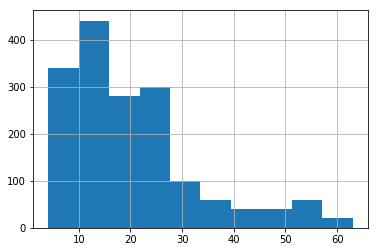

In [51]:
import matplotlib.pyplot as plt
df['price_dif']=(df.po-df.pd)
df.price_dif.hist()
plt.show()

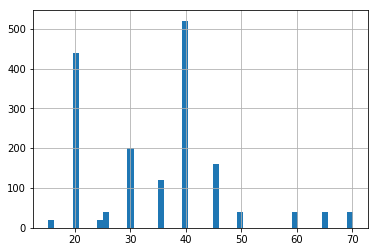

In [52]:
df['price_dif']=100-round((df.pd/df.po*100),2)
df.price_dif.hist(bins=50)

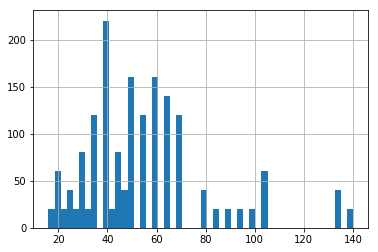

In [53]:
df['po'].hist(bins=50)

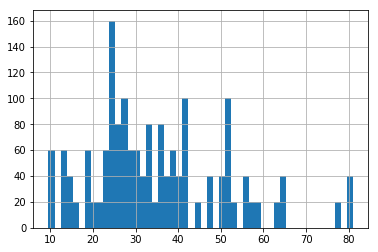

In [54]:
df['pd'].hist(bins=50)

In [55]:
df.describe()

,number_available_sizes,po,pd,price_dif
count,1680.000000,1680.000000,1680.000000,1680.000000
mean,7.500000,55.013333,35.233571,34.956429
std,3.038369,25.518447,15.909934,12.604274
min,1.000000,15.950000,9.550000,15.210000
25%,5.000000,38.950000,23.950000,20.030000
50%,7.000000,49.950000,32.450000,37.860000
75%,9.000000,64.950000,42.712500,40.052500
max,20.000000,139.950000,80.950000,70.100000


In [56]:
df_po=df[['brand_name','is_premium','po']]
df_po.columns=['brand','premium','price']
df_pd=df[['brand_name','is_premium','pd']]
df_pd.columns=['brand','premium','price']

In [57]:
df_p=pd.concat([df_po,df_pd],keys=['1','2']).reset_index().drop('sku',axis=1)
df_p.head()

,level_0,brand,premium,price
0,1,Nike Sportswear,False,15.95
1,1,Lacoste,True,59.95
2,1,River Island,False,33.00
3,1,Polo Ralph Lauren,True,49.95
4,1,WAUW CAPOW by Bangbang Copenhagen,True,64.95


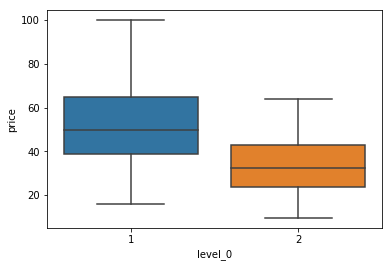

In [58]:
import seaborn as sns
#ax = sns.violinplot(y="pd", data=df, palette="Set2",showfliers=False)
ax = sns.boxplot(x="level_0", y="price", data=df_p, showfliers=False)

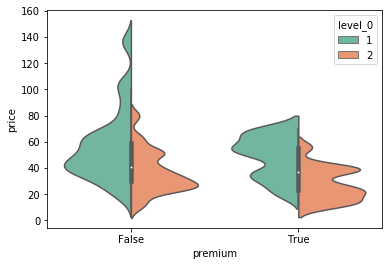

In [59]:
ax = sns.violinplot(y="price", x='premium', hue='level_0',scale='count', data=df_p[df_p.price<200], palette="Set2", split=True)

In [61]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


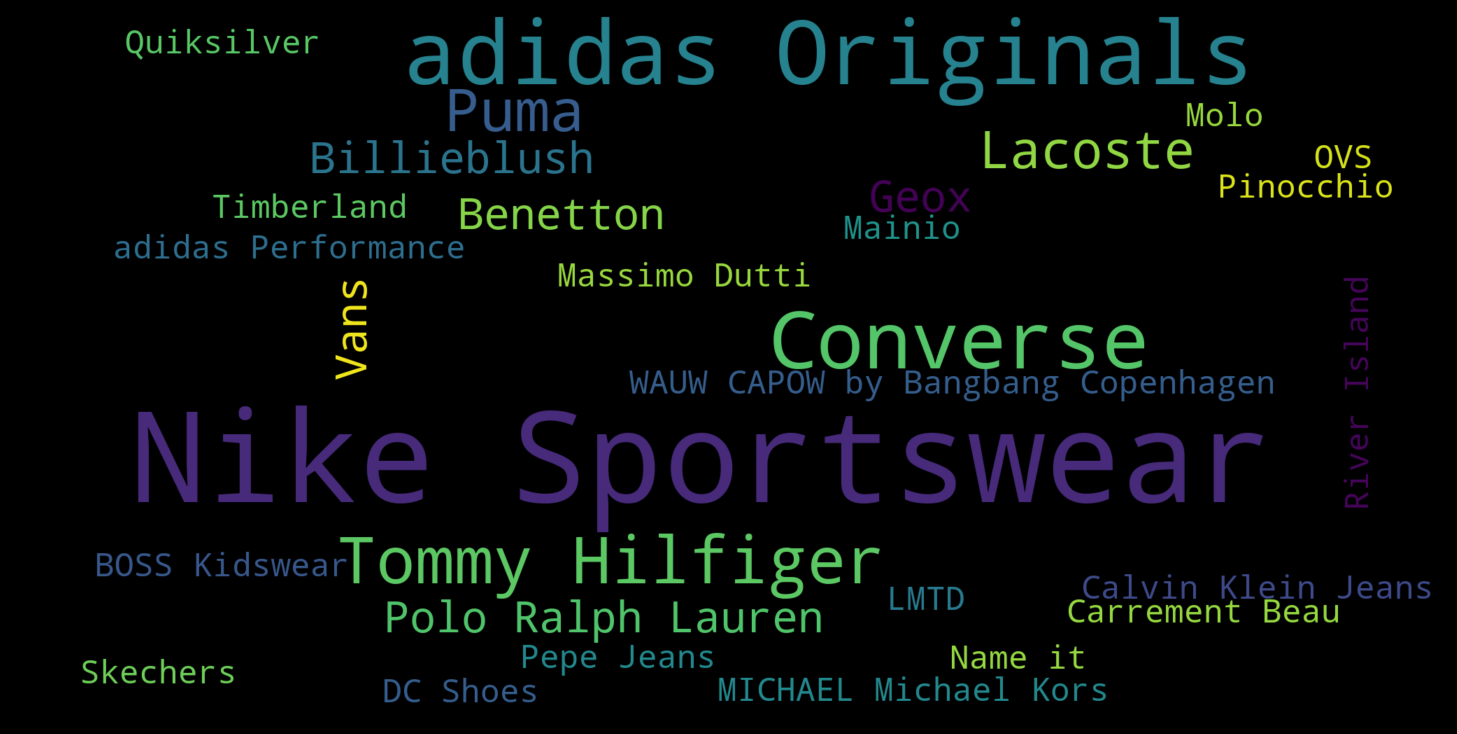

In [62]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000, height=1000)
wordcloud.generate_from_frequencies(frequencies=df.brand_name.value_counts())
plt.figure(figsize=(20,10), facecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

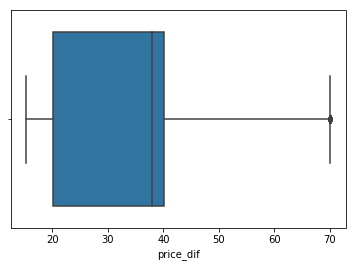

In [63]:
sns.boxplot(df.price_dif)

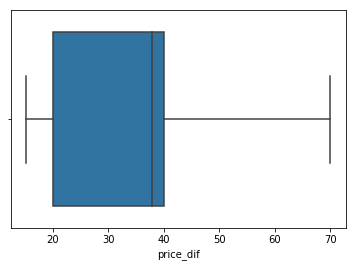

In [64]:
sns.boxplot(df.price_dif, showfliers=False)

In [65]:
df.groupby('product_group')['price_dif'].agg('mean')

product_group
accessoires    25.030000
clothing       37.575833
shoe           34.214828
Name: price_dif, dtype: float64

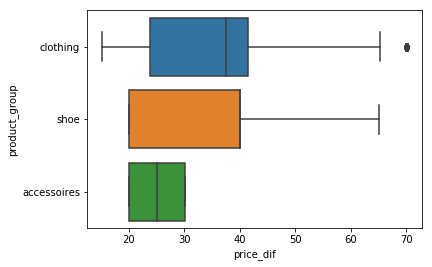

In [66]:
ax = sns.boxplot(x="price_dif", y="product_group", data=df, showfliers=True)

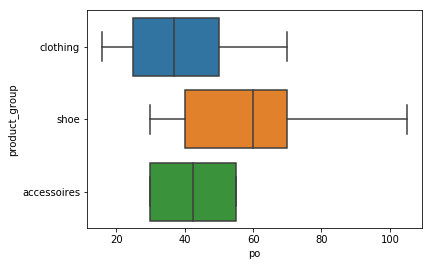

In [67]:
ax = sns.boxplot(x="po", y="product_group", data=df, showfliers=False)

In [69]:
df.product_group.value_counts()

shoe           1160
clothing        480
accessoires      40
Name: product_group, dtype: int64

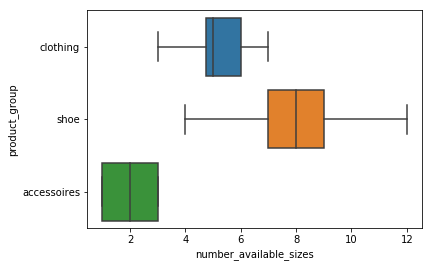

In [70]:
ax = sns.boxplot(x="number_available_sizes", y="product_group", data=df, showfliers=False)

In [71]:
df.groupby('product_group')['number_available_sizes'].agg('mean')

product_group
accessoires    2.000000
clothing       5.375000
shoe           8.568966
Name: number_available_sizes, dtype: float64

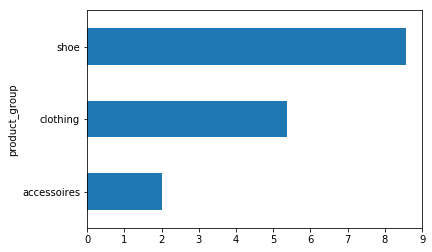

In [72]:
df.groupby('product_group')['number_available_sizes'].agg('mean').plot.barh()

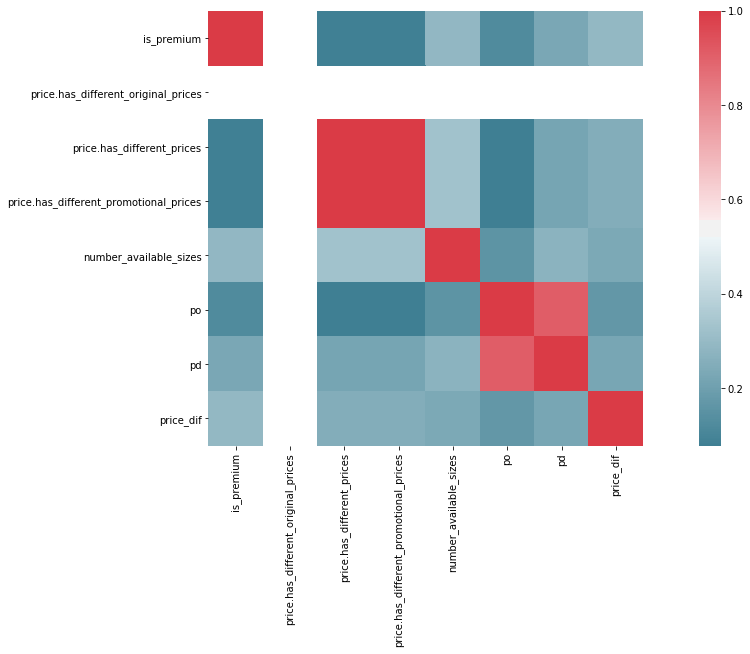

In [73]:
df1c=abs(df.corr())

f,ax=plt.subplots(figsize=(20,8))

sns.heatmap(df1c,cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)
plt.show()

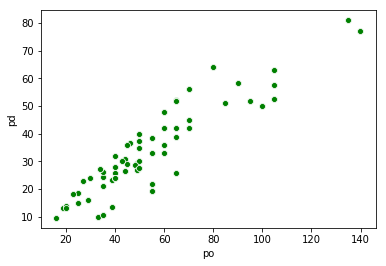

In [74]:
ax = sns.scatterplot(x = df.po,y=df.pd, color='g')

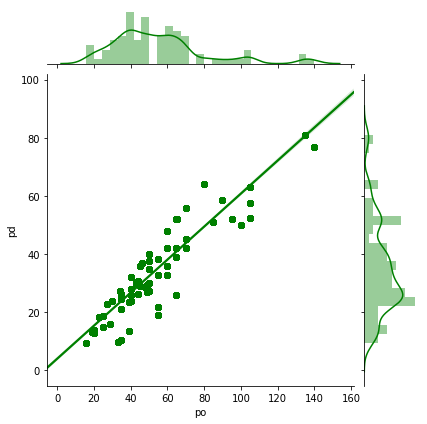

In [75]:
ax = sns.jointplot(x = df.po,y=df.pd, color='g',kind='reg')

In [76]:
df.groupby('product_group')[['price_dif','brand_name']].agg('max')

,price_dif,brand_name
product_group,,
accessoires,30.03,Tommy Hilfiger
clothing,70.10,adidas Originals
shoe,65.15,adidas Performance


In [77]:
df['abs_dif']=df.po-df.pd
df[df.abs_dif>0].groupby('product_group')[['abs_dif','brand_name']].agg('min')

,abs_dif,brand_name
product_group,,
accessoires,6.0,BOSS Kidswear
clothing,4.1,Benetton
shoe,6.0,Converse


In [98]:
xx = df[df.abs_dif>0].groupby('product_group')[['abs_dif','brand_name']].agg('max')
for i in xx['abs_dif']:
    print(i)

16.5
39.0
62.999999999999986


In [101]:
link=df[df.abs_dif==62.999999999999986].media.iloc[0][0]['path']

In [102]:
from IPython.display import Image
Image(url= 'https://mosaic03.ztat.net/vgs/media/pack/article-image-mhq'+'/'+link)

In [ ]:
"""
inp=> Links to all obj at zalando.fr
out=> DF with all the objects -||-

steps: loop:
1. Send get request to website
2 Normalize json file into pd DF
3. Append DataFrames



"""

In [102]:
df.shape

(1680, 15)

In [103]:
df.brand_name.value_counts().head()

adidas Performance    180
Name it               140
Nike Performance      140
River Island          100
Tommy Hilfiger         80
Name: brand_name, dtype: int64

In [69]:
[float(i.split()[0].replace(',','.')) for i in df['price.original']]

[14.95,
 24.95,
 55.0,
 29.0,
 10.95,
 139.95,
 44.95,
 24.99,
 29.95,
 16.95,
 44.95,
 65.0,
 34.95,
 34.95,
 44.95,
 69.95,
 139.95,
 21.95,
 54.95,
 23.0,
 14.95,
 44.95,
 19.95,
 22.95,
 22.95,
 24.95,
 36.95,
 104.95,
 44.95,
 34.95,
 59.95,
 39.95,
 44.95,
 24.99,
 54.95,
 44.95,
 139.95,
 25.0,
 26.95,
 19.95,
 159.95,
 15.95,
 39.95,
 59.95,
 17.95,
 19.95,
 19.98,
 64.95,
 49.95,
 49.95,
 24.95,
 54.95,
 34.95,
 84.95,
 54.95,
 69.95,
 22.95,
 34.95,
 64.95,
 29.95,
 54.95,
 54.95,
 23.96,
 19.95,
 29.95,
 24.95,
 39.95,
 69.95,
 35.95,
 54.95,
 69.95,
 21.95,
 15.0,
 39.95,
 34.95,
 24.95,
 34.99,
 34.95,
 29.95,
 64.95,
 79.95,
 49.95,
 64.95,
 9.95,
 14.95,
 24.95,
 55.0,
 29.0,
 10.95,
 139.95,
 44.95,
 24.99,
 29.95,
 16.95,
 44.95,
 65.0,
 34.95,
 34.95,
 44.95,
 69.95,
 139.95,
 21.95,
 54.95,
 23.0,
 14.95,
 44.95,
 19.95,
 22.95,
 22.95,
 24.95,
 36.95,
 104.95,
 44.95,
 34.95,
 59.95,
 39.95,
 44.95,
 24.99,
 54.95,
 44.95,
 139.95,
 25.0,
 26.95,
 19.95,
 159.95,
 1

In [104]:
df['price.original']=df['price.original'].str.replace(',','.').str.extract('(\d+\.\d*)').astype(float)
df['price.promotional']=df['price.promotional'].str.replace(',','.').str.extract('(\d+\.\d*)').astype(float)


In [105]:
df['price.original']

sku
NA823G19A-Q11     14.95
DC124G04C-A11     24.95
PU113D05F-E11     55.00
AI213J00A-M11     29.00
GP024G0GB-K11     10.95
TO124L02V-K11    139.95
AD543G06Y-C11     44.95
NL623C01I-K11     24.99
NA824A0N1-K11     29.95
OV023B04U-K11     16.95
PE124B00J-K11     44.95
PU115O06O-G11     65.00
1SP83C00A-Q11     34.95
N1243E0LY-K11     34.95
SK114F004-K11     44.95
LA214D03S-K11     69.95
UG113I00L-Q11    139.95
NA823F0YL-M11     21.95
GE114D06C-K11     54.95
RI923A014-K11     23.00
JOC43I000-A11     14.95
F5713I011-K11     44.95
L5214E001-Q11     19.95
RI923L01Y-A11     22.95
AD124G02P-A11     22.95
OV023J02V-K11     24.95
AI216C013-E12     36.95
NI114D04B-A11    104.95
AD543G06Y-K11     44.95
N1243D0ZI-K11     34.95
                  ...  
TO124I02I-K11     54.95
B5813F006-D11     69.95
RI983C014-J11     22.95
AD543A1Z7-A14     34.95
SK113D05G-J11     64.95
OV024L041-G11     29.95
PR313A06A-Q11     54.95
RI923L022-C11     54.95
GP024L02G-K11     23.96
N1243E0IL-Q11     19.95
L5214D004-K1

In [106]:
df['price_dif']=df['price.original']-df['price.promotional']

In [109]:
total_disc=df[['brand_name', 'price_dif']].groupby(['brand_name']).sum()
total_disc.sort_values(by='price_dif', ascending=False).index[0]

'Aigle'

In [116]:
total_disc[total_disc.price_dif==0].index

Index(['Aigle', 'BOSS Kidswear', 'Benetton', 'Birkenstock', 'Bisgaard',
       'Clarks', 'Converse', 'Crocs', 'DC Shoes', 'Easy Peasy', 'Friboo',
       'GAP', 'Geox', 'Jordan', 'Kappa', 'LICO', 'Lacoste', 'Name it',
       'New Look 915 Generation', 'Nike Performance', 'Nike Sportswear', 'OVS',
       'Pepe Jeans', 'Petit Bateau', 'Primigi', 'Puma', 'River Island',
       'Skechers', 'Speedo', 'Superfit', 'Tommy Hilfiger', 'UGG', 'Uhlsport',
       'adidas Originals', 'adidas Performance'],
      dtype='object', name='brand_name')